In [65]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier , export_text
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [66]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')


In [67]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [68]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [69]:
test_data.shape
train_data.shape

(891, 12)

In [70]:
test_data.head()
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
test_data.describe()
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [72]:
test_data.isnull().sum()
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [73]:
train_data = train_data.dropna(subset=['Embarked', 'Age'])
test_data = test_data.dropna(subset=['Age'])

In [74]:
train_data.shape
test_data.shape

(332, 11)

In [75]:
# prompt: drop cabin , age

train_data = train_data.drop(['Cabin', 'Age'], axis=1)
test_data = test_data.drop(['Cabin', 'Age'], axis=1)

In [76]:
test_data.shape
train_data.shape

(712, 10)

In [77]:
X = train_data.drop('Survived', axis=1)  # Use train_data if dropna_train is not available
y = train_data['Survived']


# Identify categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to the categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


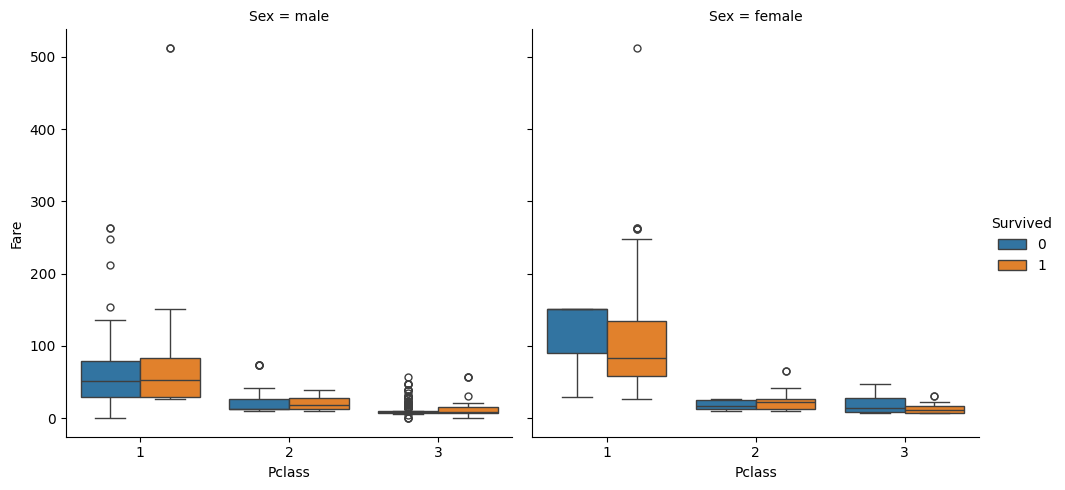

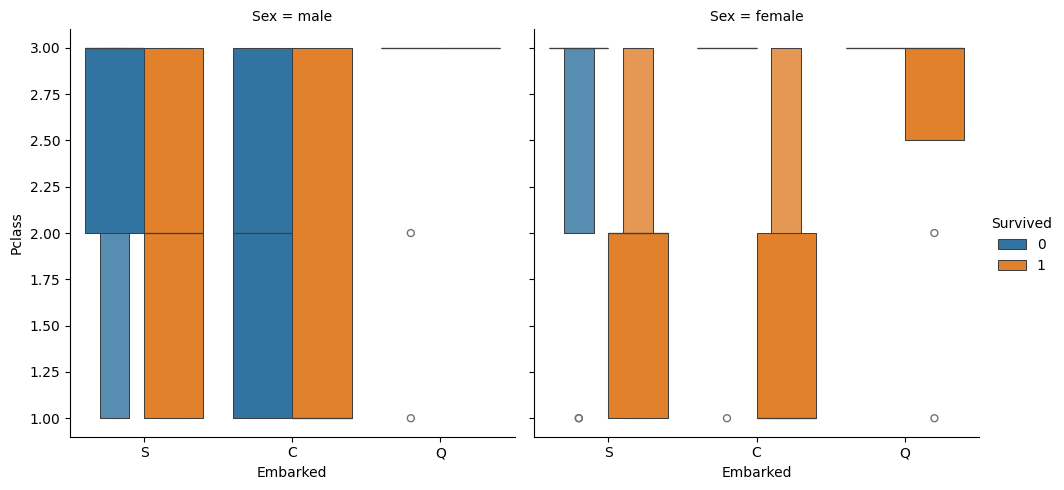

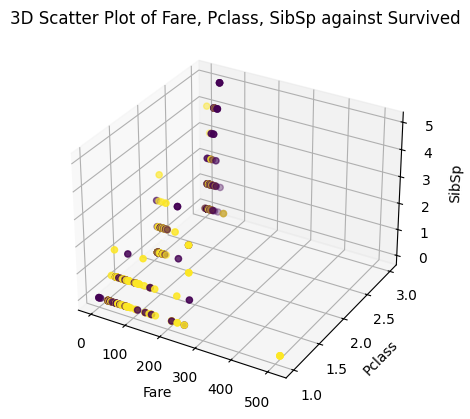

In [78]:
# Instead of 'Age', use another numerical feature available in your train_data, like 'Fare'
sns.catplot(x='Pclass', y='Fare', hue='Survived', col='Sex', kind='box', data=train_data)
plt.show()

# Example: Pclass, Embarked, and Sex vs. Survival
sns.catplot(x='Embarked', y='Pclass', hue='Survived', col='Sex', kind='boxen', data=train_data)
plt.show()

#  Multivariate analysis with 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Filter for numerical features
numerical_cols = train_data.select_dtypes(include=np.number)

# Assuming 'Fare' is a numerical feature in your data
x = numerical_cols['Fare']
y = numerical_cols['Pclass']
z = numerical_cols['SibSp'] # Replace 'SibSp' with another numerical column if desired

ax.scatter(x, y, z, c=train_data['Survived'], marker='o')
ax.set_xlabel('Fare')
ax.set_ylabel('Pclass')
ax.set_zlabel('SibSp')
plt.title('3D Scatter Plot of Fare, Pclass, SibSp against Survived')
plt.show()

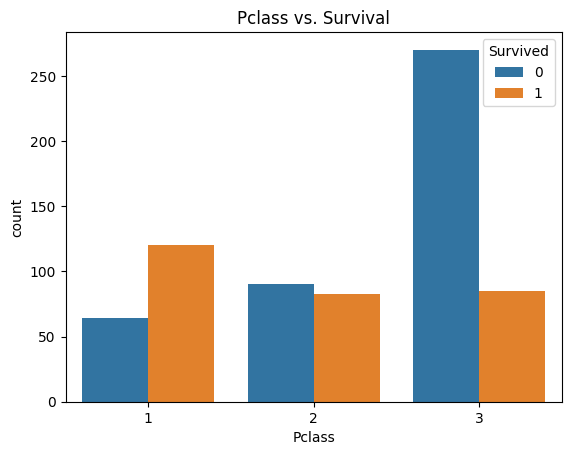

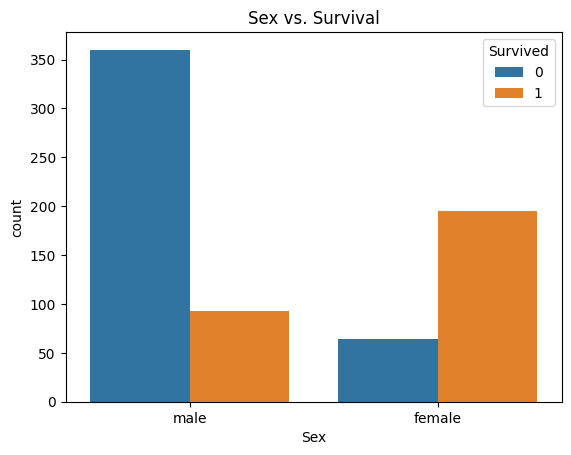

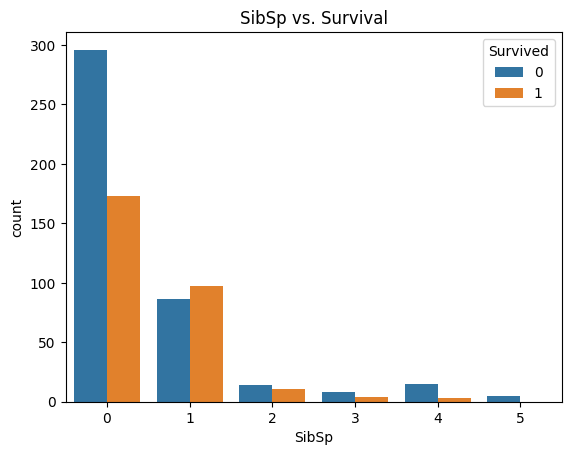

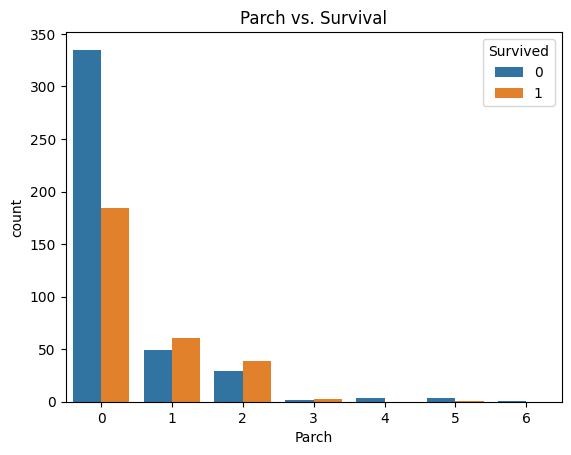

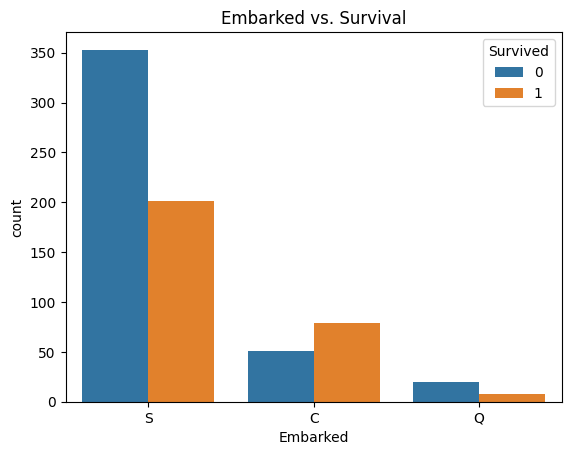

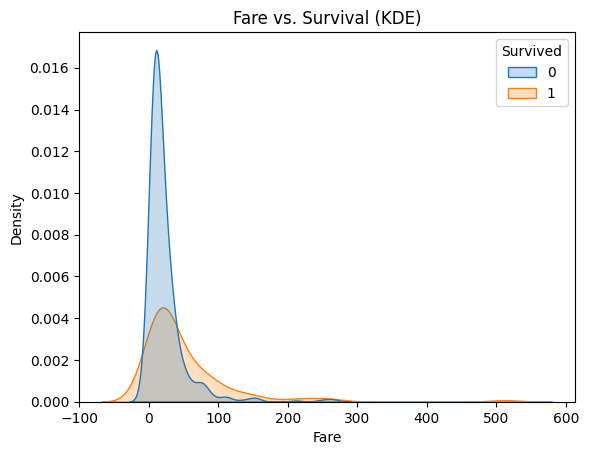

In [79]:
# Example: Pclass vs. Survival
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Pclass vs. Survival')
plt.show()

# Example: Sex vs. Survival
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Sex vs. Survival')
plt.show()

# Example: SibSp vs. Survival
sns.countplot(x='SibSp', hue='Survived', data=train_data)
plt.title('SibSp vs. Survival')
plt.show()

# Example: Parch vs. Survival
sns.countplot(x='Parch', hue='Survived', data=train_data)
plt.title('Parch vs. Survival')
plt.show()

# Example: Embarked vs. Survival
sns.countplot(x='Embarked', hue='Survived', data=train_data)
plt.title('Embarked vs. Survival')
plt.show()

# Example: Fare vs. Survival (using a KDE plot for numerical data)
sns.kdeplot(data=train_data, x='Fare', hue='Survived', fill=True)
plt.title('Fare vs. Survival (KDE)')
plt.show()

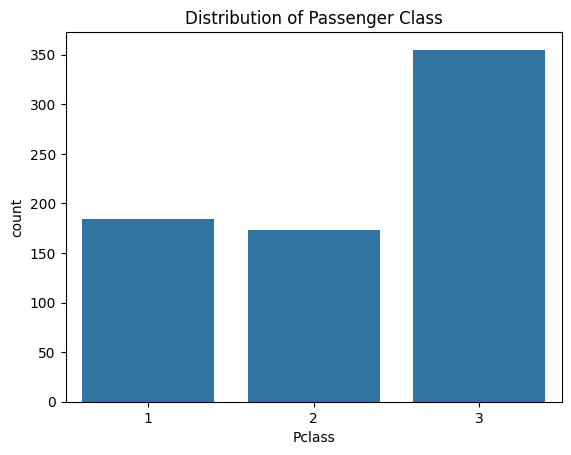

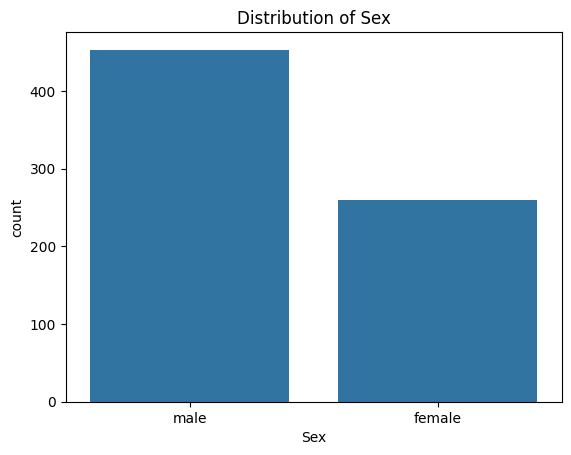

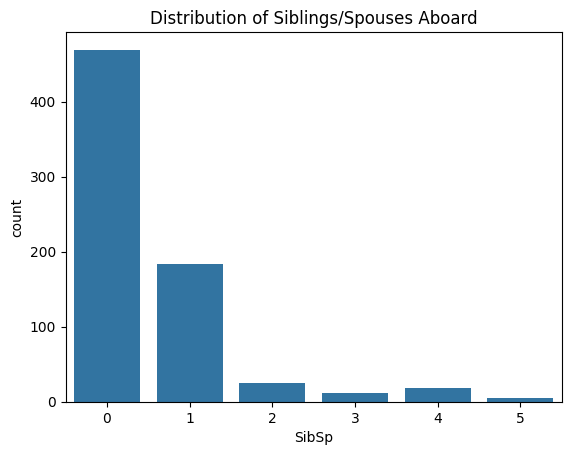

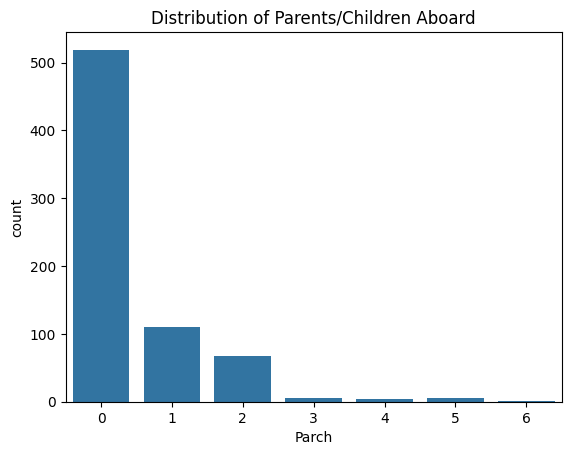

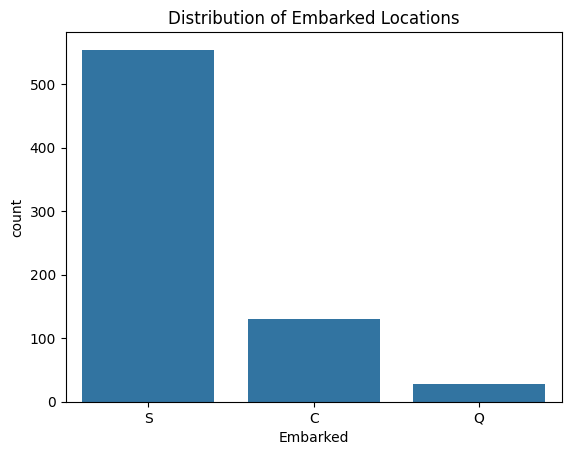

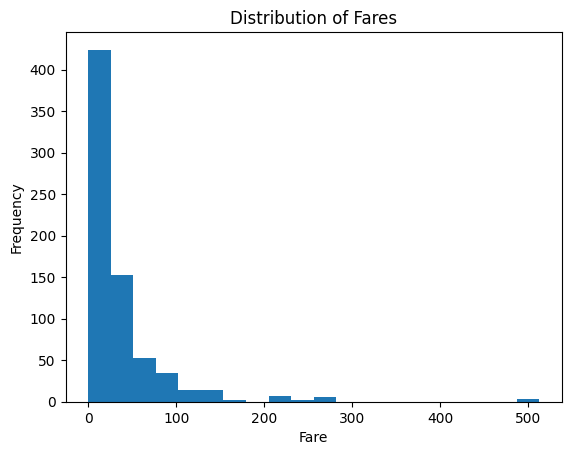

In [80]:
# Example: Pclass distribution
sns.countplot(x='Pclass', data=train_data)
plt.title('Distribution of Passenger Class')
plt.show()

# Example: Sex distribution
sns.countplot(x='Sex', data=train_data)
plt.title('Distribution of Sex')
plt.show()

# Example: SibSp distribution
sns.countplot(x='SibSp', data=train_data)
plt.title('Distribution of Siblings/Spouses Aboard')
plt.show()

# Example: Parch distribution
sns.countplot(x='Parch', data=train_data)
plt.title('Distribution of Parents/Children Aboard')
plt.show()

# Example: Embarked distribution
sns.countplot(x='Embarked', data=train_data)
plt.title('Distribution of Embarked Locations')
plt.show()

# Example: Fare distribution (using a histogram for numerical data)
plt.hist(train_data['Fare'], bins=20)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fares')
plt.show()

Outliers in 'Fare':
     PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
34            35         0       1   
52            53         1       1   
62            63         0       1   
..           ...       ...     ...   
802          803         1       1   
820          821         1       1   
835          836         1       1   
856          857         1       1   
879          880         1       1   

                                                  Name     Sex  SibSp  Parch  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
27                      Fortune, Mr. Charles Alexander    male      3      2   
34                             Meyer, Mr. Edgar Joseph    male      1      0   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female      1      0   
62                         Harris, Mr. Henry Birkhardt    male      1      0   
..                                         

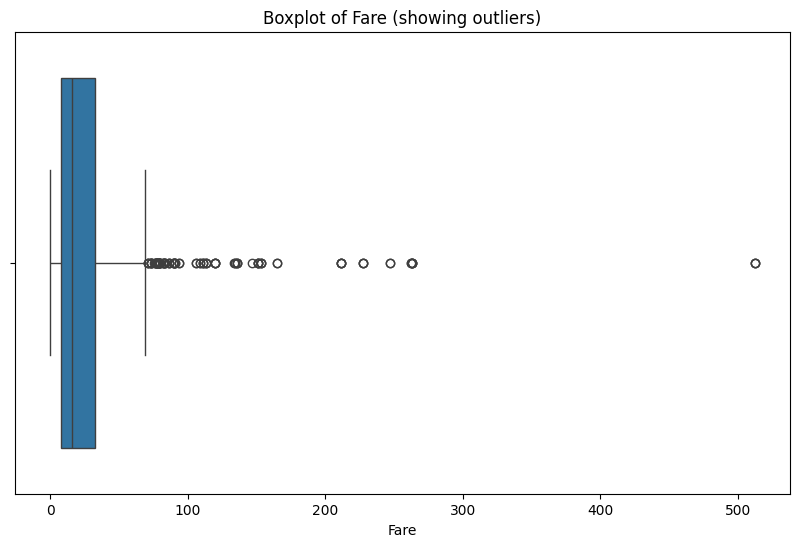

In [81]:
# Outlier Detection using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect outliers in 'Fare' column
outliers_fare = detect_outliers_iqr(train_data, 'Fare')
print("Outliers in 'Fare':")
print(outliers_fare)

# Visualize outliers (optional)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fare', data=train_data)
plt.title('Boxplot of Fare (showing outliers)')
plt.show()
#Cap Outliers
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data

train_data = cap_outliers(train_data, 'Fare')

In [82]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for normalization
numerical_cols = ['Fare']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])

In [83]:
train_data = train_data.drop(['Name', 'Ticket', 'PassengerId'], axis=1)
test_data = test_data.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

In [84]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [85]:
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


In [86]:
model=RandomForestClassifier()
model.fit(X,y)

RandomForestClassifier()

In [87]:
train_pred=model.predict(X)
test_pred=model.predict(X)

In [88]:
print(accuracy_score(y,train_pred))


0.9058988764044944


In [89]:
cm=confusion_matrix(y,train_pred )
print(cm)

[[410  14]
 [ 53 235]]


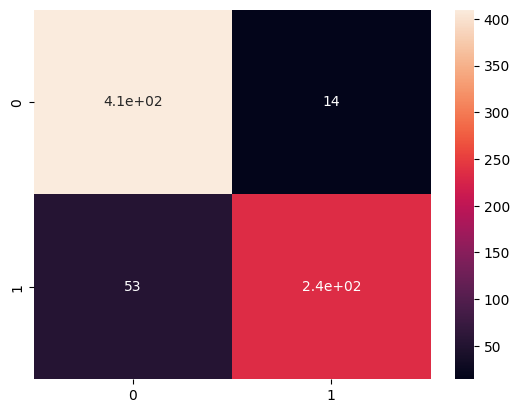

In [90]:
heatmap=sns.heatmap(cm,annot=True)

In [91]:
X.head()

,Pclass,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,1,0,0.102946,True,False,True
1,1,1,0,1.000000,False,False,False
2,3,0,0,0.112531,False,False,True
3,1,1,0,0.753994,False,False,True
4,3,0,0,0.114306,True,False,True


In [92]:
model=LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [93]:
y_pred=model.predict(X)

In [94]:
accuracy_score(y,y_pred)

0.7823033707865169

In [95]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       424
           1       0.73      0.72      0.73       288

    accuracy                           0.78       712
   macro avg       0.77      0.77      0.77       712
weighted avg       0.78      0.78      0.78       712



<Axes: >

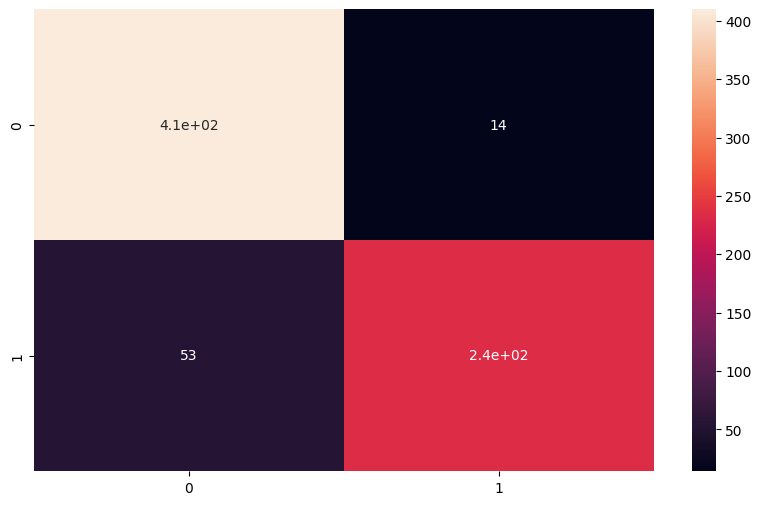

In [96]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)

In [97]:
print(cm)

[[410  14]
 [ 53 235]]


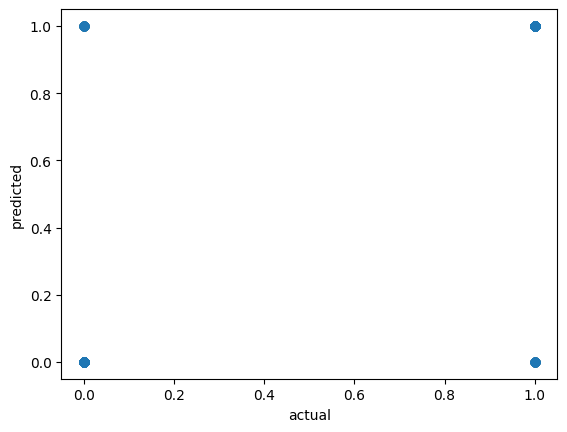

In [98]:
plt.scatter(y,y_pred)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

In [99]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier()

In [100]:
y_pred = knn.predict(X)

In [101]:
accuracy_score(y, y_pred)

0.824438202247191

In [102]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       424
           1       0.81      0.74      0.77       288

    accuracy                           0.82       712
   macro avg       0.82      0.81      0.81       712
weighted avg       0.82      0.82      0.82       712



<function matplotlib.pyplot.show(close=None, block=None)>

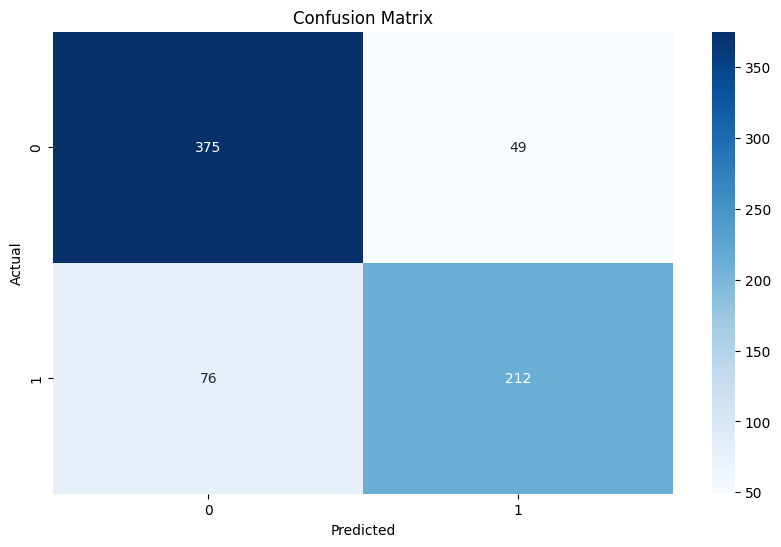

In [103]:
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show

In [104]:
print(confusion_matrix(y, y_pred))

[[375  49]
 [ 76 212]]


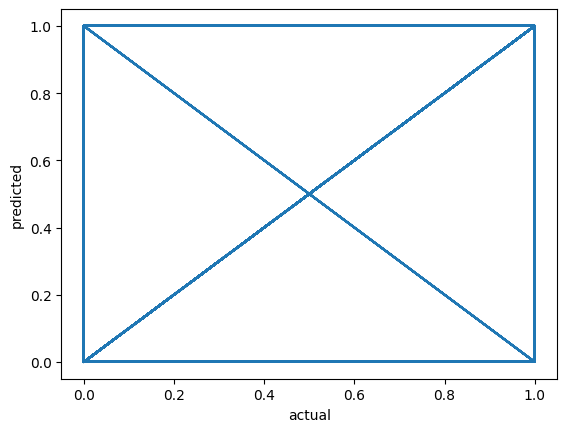

In [105]:
plt.plot(y, y_pred)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

In [106]:
scalar = StandardScaler()
scalar.fit(X)

StandardScaler()

In [107]:
svm = SVC()
svm.fit(X, y)

SVC()

In [108]:
y_pred = svm.predict(X)

In [109]:
accuracy_score(y, y_pred)


0.7991573033707865

In [110]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       424
           1       0.81      0.66      0.73       288

    accuracy                           0.80       712
   macro avg       0.80      0.78      0.78       712
weighted avg       0.80      0.80      0.80       712



<Axes: >

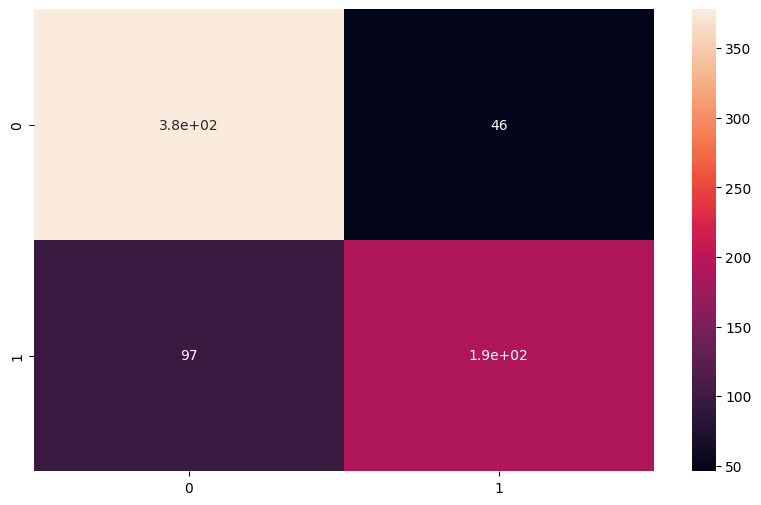

In [111]:
cm=confusion_matrix(y,y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)

In [112]:
print(confusion_matrix(y, y_pred))

[[378  46]
 [ 97 191]]


In [113]:
clf=DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

In [114]:
tree_text=export_text(clf)
print(tree_text)

|--- feature_4 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_3 <= 0.41
|   |   |   |--- feature_3 <= 0.40
|   |   |   |   |--- feature_3 <= 0.37
|   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |--- feature_3 <= 0.19
|   |   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 1.00
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 0.18
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 0.16
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  0.16
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_3 >  0.18
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_2 >  1.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feat

In [115]:
tree_pred=clf.predict(X)

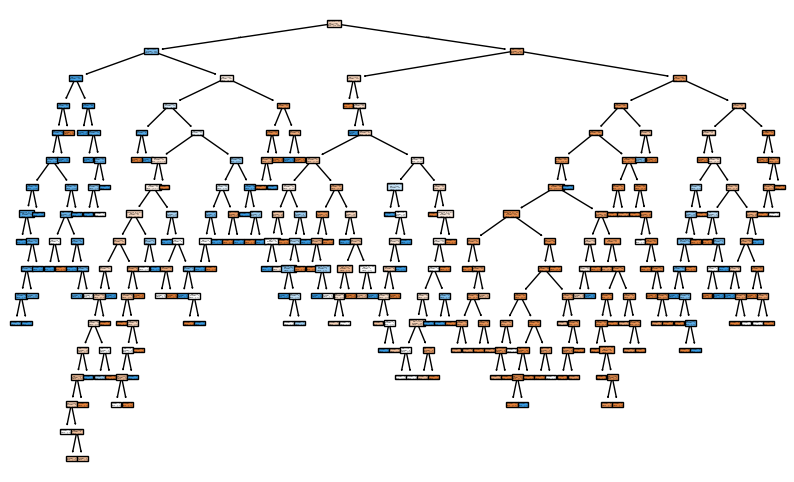

In [116]:
plt.figure(figsize=(10,6))
plt_tree = plot_tree(clf, feature_names=X.columns, filled=True)

In [117]:
accuracy_score(y,tree_pred)

0.9058988764044944

In [118]:
cm=confusion_matrix(y,tree_pred)
print(cm)

[[417   7]
 [ 60 228]]


In [119]:
categorical_cols_test = test_data.select_dtypes(include=['object']).columns

# Apply one-hot encoding to the categorical features in test data
test_data = pd.get_dummies(test_data, columns=categorical_cols_test, drop_first=True)

# Ensure both train and test data have the same columns after one-hot encoding
missing_cols = set(X.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0  # Fill missing columns with 0s
test_data = test_data[X.columns]

# Normalize numerical features in test data (using the same scaler fitted on training data)
test_data[numerical_cols] = scaler.transform(test_data[numerical_cols])

In [125]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Now you can use X_test for predictions or other operations
y_test_df = pd.DataFrame(X_test)
y_test_df.to_csv('y_test.csv', index=False)

In [127]:
y_test = clf.predict(X_test)

In [130]:
dropped_columns = ['Cabin', 'Age', 'Name', 'Ticket', 'PassengerId']
dropped_columns

['Cabin', 'Age', 'Name', 'Ticket', 'PassengerId']

In [140]:
# Load Kaggle test dataset
kaggle_test = pd.read_csv('test.csv')  # Replace with Kaggle's test.csv

# Store PassengerId before any preprocessing
passenger_ids = kaggle_test['PassengerId']

# Preprocessing steps (same as before, but keep all rows in test_data)
# ...

# Identify categorical columns in test data
categorical_cols_test = kaggle_test.select_dtypes(include=['object']).columns

# Apply one-hot encoding to the categorical features in test data
kaggle_test = pd.get_dummies(kaggle_test, columns=categorical_cols_test, drop_first=True)

# Ensure both train and test data have the same columns after one-hot encoding
missing_cols = set(X.columns) - set(kaggle_test.columns)
for col in missing_cols:
    kaggle_test[col] = 0  # Fill missing columns with 0s
kaggle_test = kaggle_test[X.columns]


# Drop PassengerId for prediction (if it still exists)
kaggle_test = kaggle_test.drop(columns=['PassengerId'], errors='ignore') # 'errors='ignore'' avoids KeyError

# Assuming 'clf' is your trained model, predict on test_data
predictions = clf.predict(kaggle_test)

# Create a DataFrame for predictions using stored passenger_ids
predictions_df = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': predictions})

# Save predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)